### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

### Reading WAV file

In [1]:
from scipy.io import wavfile

freq, y = wavfile.read('audio/NoisyAC.wav')

freq, y

(44100,
 array([[101, 358],
        [107, 326],
        [ 65, 300],
        ...,
        [ 31,  46],
        [ 26,  43],
        [ -8,  34]], dtype=int16))

In [2]:
# separate left from right ear

y_left = y[:, 0]
y_right = y[:, 1]

### Creating the time domain from the frequency

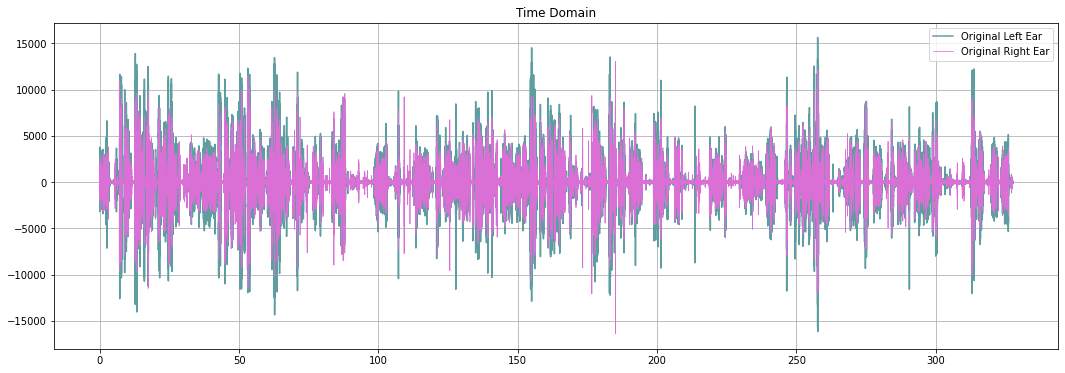

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.figure(figsize=(18,6))
plt.plot(t, y_left, label='Original Left Ear', color='cadetblue')
plt.plot(t, y_right, label='Original Right Ear', color='orchid', lw=0.75)
plt.title('Time Domain')
plt.grid()
plt.legend()

### Convert the time domain to frquency domain

Function to transform time domain $\rightarrow$ frequency domain
$$
X_k = \sum_{n=0}^{N-1}x_n\cdot e^{\frac{-2kn\pi i}{N}}
$$

Luckily `scipy`'s `fftfreq` and `rfftfreq` can do this for us (`rfftfreq` does this on real values, so it is faster)

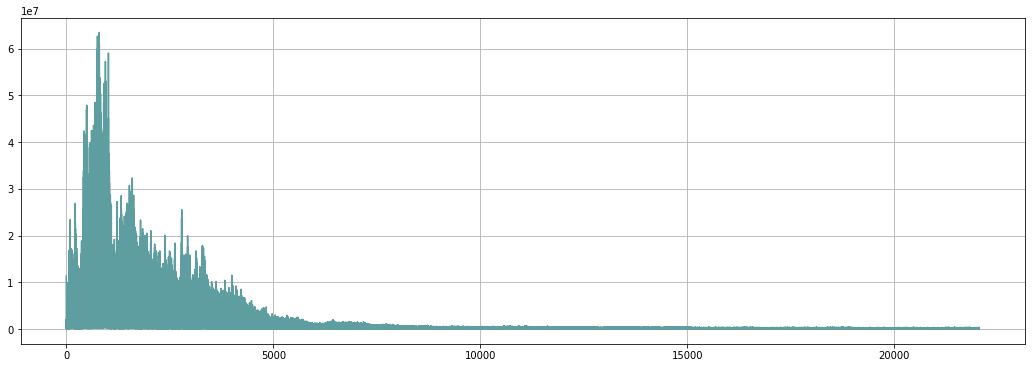

In [4]:
from scipy.fft import rfft, rfftfreq

y_left_freq = rfft(y_left)
x_freq = rfftfreq(len(t),dt)

plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_left_freq), color='cadetblue')
plt.grid()

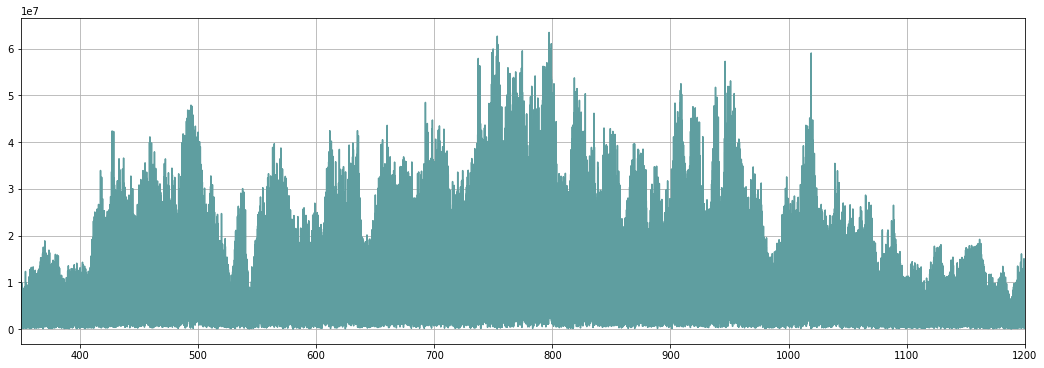

In [16]:

plt.figure(figsize=(18,6))
plt.xlim(350, 1200)
plt.plot(x_freq, np.abs(y_left_freq), color='cadetblue')
plt.grid()

### Select the mask for the least likely frequency to be noise

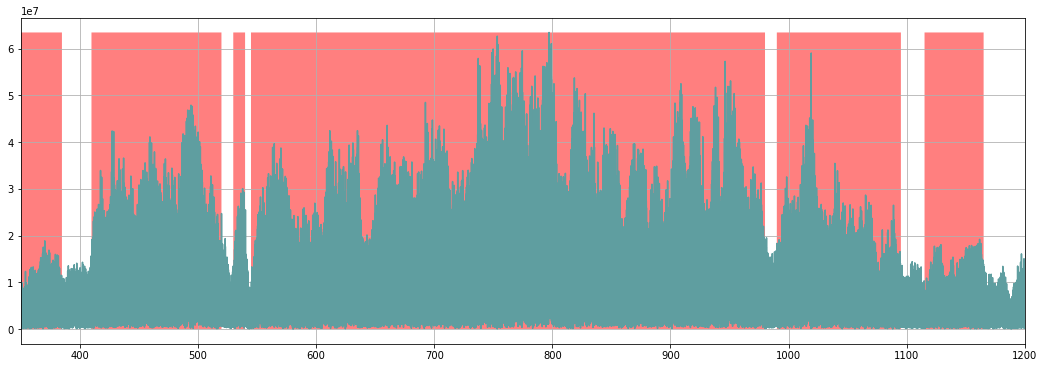

In [6]:
mask = np.where(np.logical_and(x_freq > 350, x_freq < 385), 1, 0)
mask += np.where(np.logical_and(x_freq > 410, x_freq < 520), 1, 0)
mask += np.where(np.logical_and(x_freq > 530, x_freq < 540), 1, 0)
mask += np.where(np.logical_and(x_freq > 545, x_freq < 980), 1, 0)
mask += np.where(np.logical_and(x_freq > 990, x_freq < 1095), 1, 0)
mask += np.where(np.logical_and(x_freq > 1115, x_freq < 1165), 1, 0)

plt.figure(figsize=(18,6))
plt.xlim(350, 1200)

max_y_left = np.max(np.abs(y_left_freq))
plt.plot(x_freq, np.abs(y_left_freq), color='cadetblue')
plt.fill_between(x_freq, [max_y_left*m for m in mask], facecolor='red', alpha=0.5)
plt.grid()

### clean the frequency domain with the mask

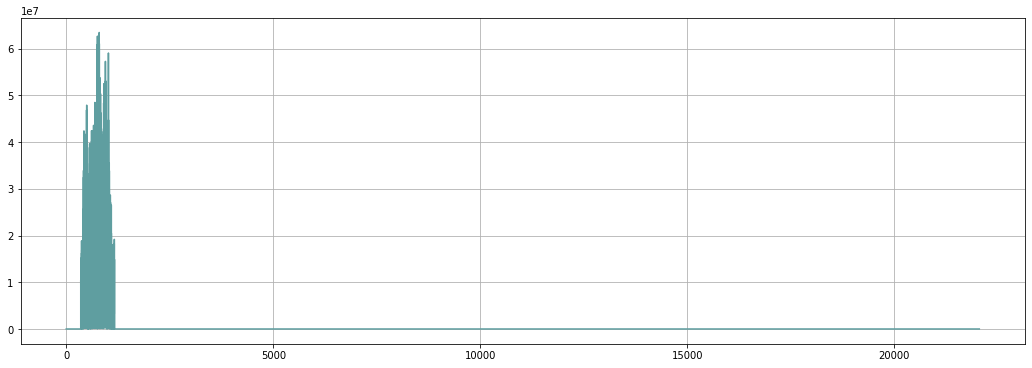

In [7]:
y_left_cleaned_freq = y_left_freq * mask
plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_left_cleaned_freq), color='cadetblue')
plt.grid()

### Apply inverse Fast Fourier Transform to get back the time domain

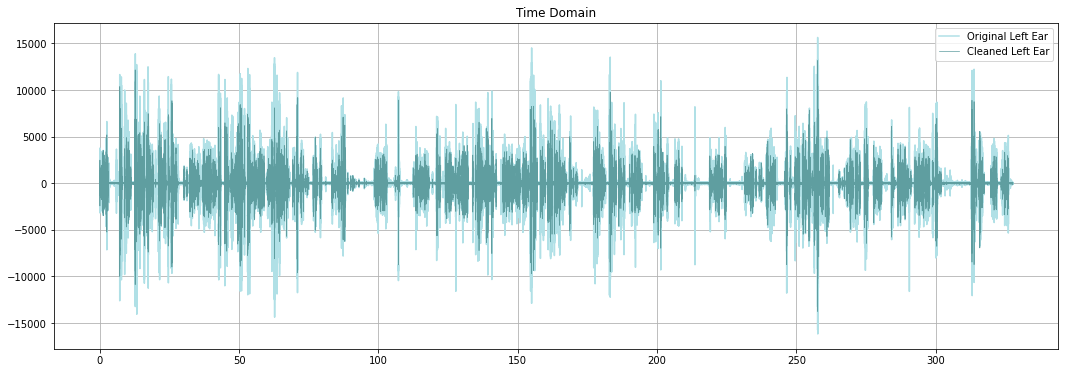

In [8]:
from scipy.fft import irfft

cleaned_y_left = irfft(y_left_cleaned_freq)
plt.figure(figsize=(18,6))
plt.plot(t, y_left, label='Original Left Ear', color='powderblue')
plt.plot(t, cleaned_y_left, label='Cleaned Left Ear', color='cadetblue', lw=0.7)

plt.title('Time Domain')
plt.grid()
plt.legend()

## Repeat same process for right ear

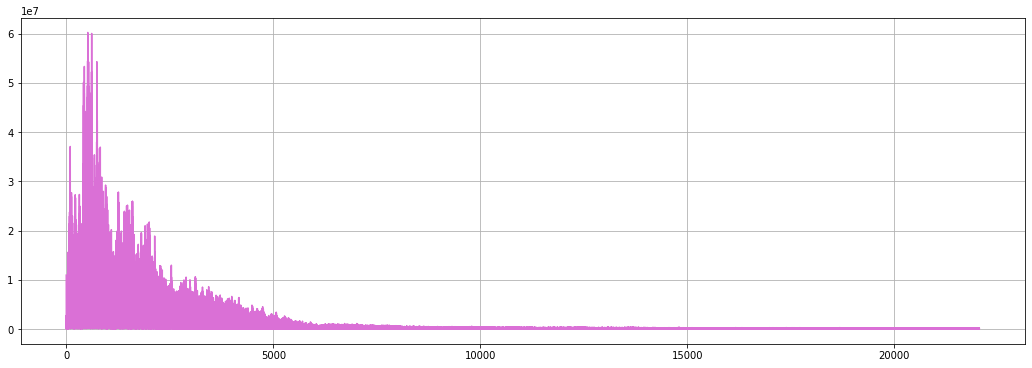

In [9]:

plt.figure(figsize=(18,6))
y_right_freq = rfft(y_right)
plt.plot(x_freq, np.abs(y_right_freq), color='orchid')
plt.grid()

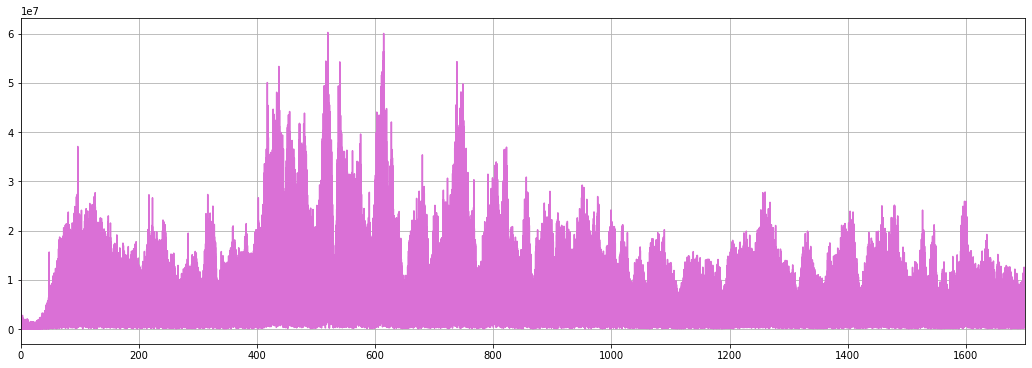

In [10]:

plt.figure(figsize=(18,6))
plt.xlim(0, 1700)
plt.plot(x_freq, np.abs(y_right_freq), color='orchid')
plt.grid()

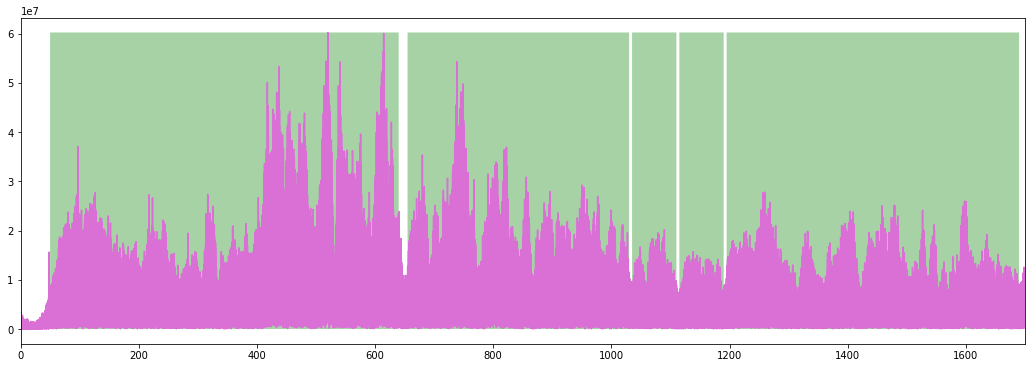

In [11]:
maskr = np.where(np.logical_and(x_freq > 50, x_freq < 640), 1, 0)
maskr += np.where(np.logical_and(x_freq > 655, x_freq < 1030), 1, 0)
maskr += np.where(np.logical_and(x_freq > 1035, x_freq < 1110), 1, 0)
maskr += np.where(np.logical_and(x_freq > 1115, x_freq < 1190), 1, 0)
maskr += np.where(np.logical_and(x_freq > 1195, x_freq < 1690), 1, 0)

plt.figure(figsize=(18,6))
plt.xlim(0, 1700)

max_y_right = np.max(np.abs(y_right_freq))
plt.plot(x_freq, np.abs(y_right_freq), color='orchid')


plt.grid()


plt.fill_between(x_freq, [max_y_right*m for m in maskr], facecolor='green', alpha=0.35)
plt.grid()

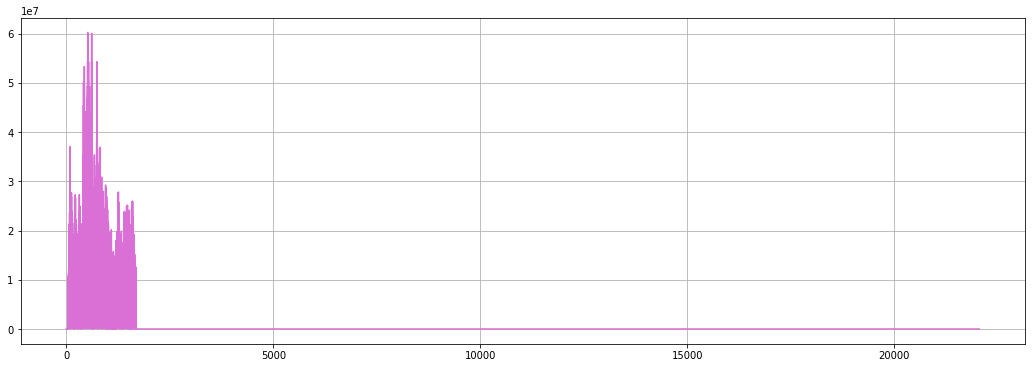

In [12]:
y_right_cleaned_freq = y_right_freq * maskr
plt.figure(figsize=(18,6))

plt.plot(x_freq, np.abs(y_right_cleaned_freq), color='orchid')
plt.grid()

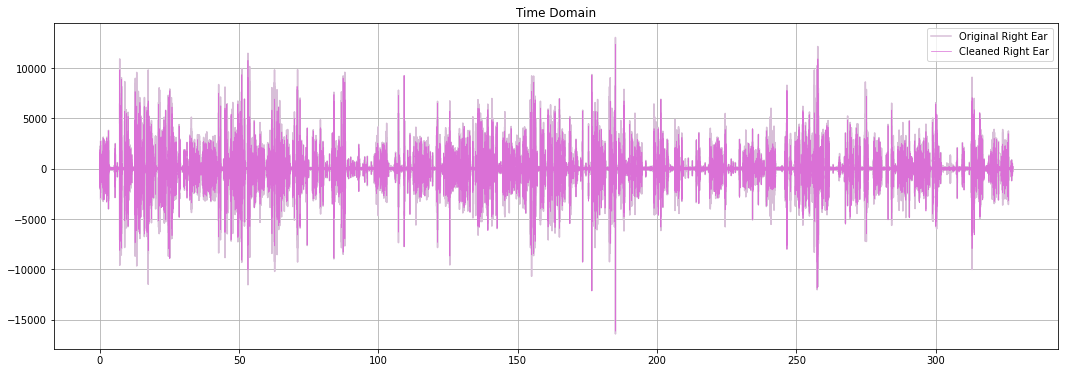

In [13]:
cleaned_y_right = irfft(y_right_cleaned_freq)
plt.figure(figsize=(18,6))
plt.plot(t, y_right, label='Original Right Ear', color='thistle')
plt.plot(t, cleaned_y_right, label='Cleaned Right Ear', color='orchid', lw=0.7)

plt.title('Time Domain')
plt.grid()
plt.legend()

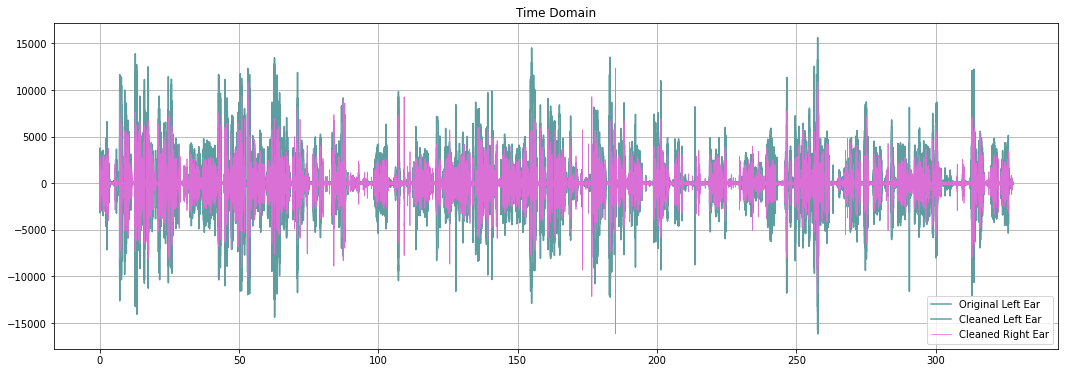

In [14]:
plt.figure(figsize=(18,6))
plt.plot(t, y_left, label='Original Left Ear', color='cadetblue')
plt.plot(t, cleaned_y_left, label='Cleaned Left Ear', color='cadetblue')
plt.plot(t, cleaned_y_right, label='Cleaned Right Ear', color='orchid', lw=0.75)
plt.title('Time Domain')
plt.grid()
plt.legend()

In [15]:
cleaned_audio = np.dstack([cleaned_y_left, cleaned_y_right])[0]
cleaned_audio
wavfile.write('audio/hw35-noise-reduction.wav', freq, np.array(cleaned_audio, dtype=np.int16))